## 1. Setup

In [1]:
import sys
sys.path.append('../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

from seg_reg_net import SegRegNet
from utils.preprocessing.misc import gaussian_smoothing
from utils.visualization.vis import plot_seg_reg_maps

Using TensorFlow backend.


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## 2. SegRegNet

In [4]:
INPUT_SHAPE = (256, 256, 3)
model = SegRegNet(input_shape=INPUT_SHAPE, loss_weights=[0.3, 0.7])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 32) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 64) 18496       max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_poolin

## Load an image with its GT

In [5]:
def desc_img(img, title=''):
    print(title, img.shape, img.dtype, (img.min(), img.max()), img.sum())

In [6]:
MULT_FACTOR = 100.

img_path = '../datasets/toy_set/train/images/001cell.png'
dots_path = '../datasets/toy_set/train/gt_dots/001dots.png'
img = skimage.io.imread(img_path) / 255.
dots = (skimage.io.imread(dots_path) > 0).max(axis=-1).astype(np.uint8)
gt_seg_map = (gaussian_smoothing([dots.astype(np.float32)], sigma=5) > 8e-4)[..., np.newaxis]
gt_density_map = MULT_FACTOR * gaussian_smoothing([dots.astype(np.float64)], sigma=5)[..., np.newaxis]

desc_img(img,  'img:')
desc_img(dots, 'dots:')
desc_img(gt_seg_map, 'seg_map:')
desc_img(gt_density_map, 'reg_map:')

img: (256, 256, 3) float64 (0.0, 0.9882352941176471) 20235.415686274508
dots: (256, 256) uint8 (0, 1) 135
seg_map: (1, 256, 256, 1) bool (False, True) 33804
reg_map: (1, 256, 256, 1) float64 (0.0, 2.001329349041127) 13500.000000000004


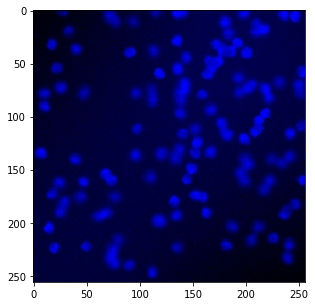

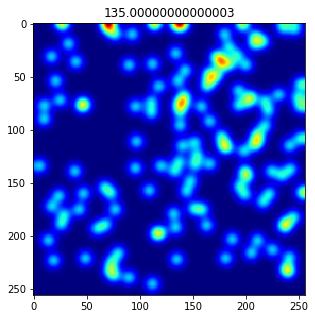

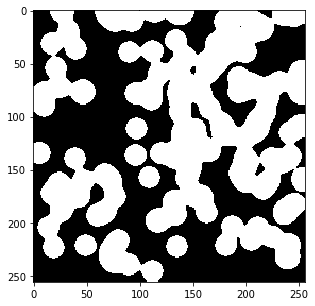

In [7]:
figsize=(12, 5)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.figure(figsize=figsize)
plt.title(gt_density_map.sum()/MULT_FACTOR)
plt.imshow(gt_density_map.squeeze()/MULT_FACTOR, cmap='jet')
plt.figure(figsize=figsize)
plt.imshow(gt_seg_map.squeeze().astype(np.float32), cmap='gray')
plt.show()

## Predict

In [8]:
preds = model.predict(img[np.newaxis])
print(len(preds))

pred1 = preds[0]
pred2 = preds[1]

desc_img(pred1, 'pred1:')
desc_img(pred2, 'pred2:')

2
pred1: (1, 256, 256, 1) float32 (0.4756694, 0.5914705) 34806.54
pred2: (1, 256, 256, 1) float32 (-0.9176965, 0.3621973) -19120.406


## Plot

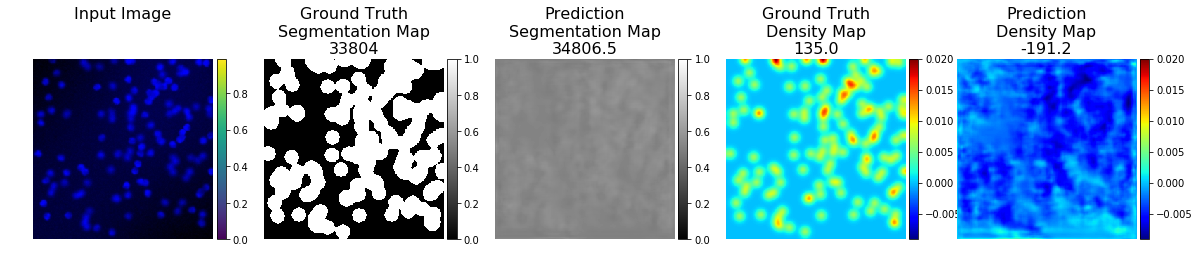

In [9]:
plot_seg_reg_maps(img, gt_seg_map, pred1, gt_density_map, pred2, MULT_FACTOR)

## Train the model on a single example (sanity check)

In [10]:
x = img[np.newaxis]
y = [gt_seg_map, gt_density_map]

Epoch 1/1
 - 2s - loss: 0.3223 - activation_1_loss: 0.6793 - conv2d_12_loss: 0.1693
Epoch 1/1
 - 0s - loss: 2.7862 - activation_1_loss: 0.7400 - conv2d_12_loss: 3.6631
Epoch 1/1
 - 0s - loss: 0.2222 - activation_1_loss: 0.6732 - conv2d_12_loss: 0.0289
Epoch 1/1
 - 0s - loss: 0.2436 - activation_1_loss: 0.6395 - conv2d_12_loss: 0.0739
Epoch 1/1
 - 0s - loss: 0.2141 - activation_1_loss: 0.6193 - conv2d_12_loss: 0.0405
Epoch 1/1
 - 0s - loss: 0.1967 - activation_1_loss: 0.5918 - conv2d_12_loss: 0.0274
Epoch 1/1
 - 0s - loss: 0.2004 - activation_1_loss: 0.5996 - conv2d_12_loss: 0.0293
Epoch 1/1
 - 0s - loss: 0.1921 - activation_1_loss: 0.5805 - conv2d_12_loss: 0.0256
Epoch 1/1
 - 0s - loss: 0.1815 - activation_1_loss: 0.5483 - conv2d_12_loss: 0.0243
Epoch 1/1
 - 0s - loss: 0.1768 - activation_1_loss: 0.5317 - conv2d_12_loss: 0.0247
Epoch 1/1
 - 0s - loss: 0.1579 - activation_1_loss: 0.4696 - conv2d_12_loss: 0.0243
Epoch 1/1
 - 0s - loss: 0.1538 - activation_1_loss: 0.4598 - conv2d_12_loss:

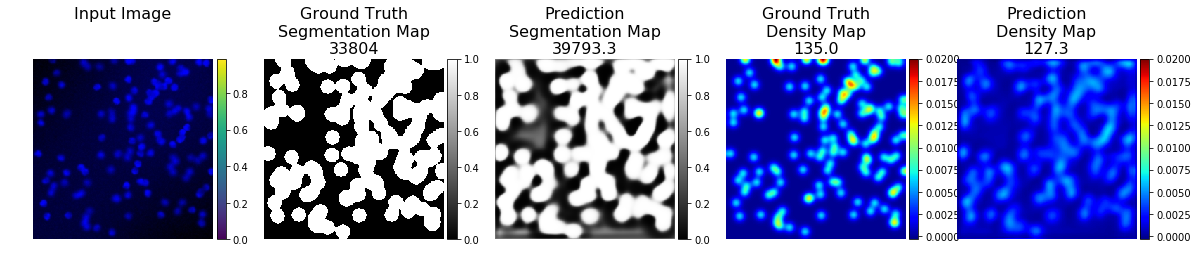

Epoch 1/1
 - 0s - loss: 0.0781 - activation_1_loss: 0.2296 - conv2d_12_loss: 0.0133
Epoch 1/1
 - 0s - loss: 0.0911 - activation_1_loss: 0.2754 - conv2d_12_loss: 0.0121
Epoch 1/1
 - 0s - loss: 0.0627 - activation_1_loss: 0.1777 - conv2d_12_loss: 0.0134
Epoch 1/1
 - 0s - loss: 0.0762 - activation_1_loss: 0.2301 - conv2d_12_loss: 0.0102
Epoch 1/1
 - 0s - loss: 0.0589 - activation_1_loss: 0.1639 - conv2d_12_loss: 0.0138
Epoch 1/1
 - 0s - loss: 0.0694 - activation_1_loss: 0.2074 - conv2d_12_loss: 0.0103
Epoch 1/1
 - 0s - loss: 0.0543 - activation_1_loss: 0.1488 - conv2d_12_loss: 0.0137
Epoch 1/1
 - 0s - loss: 0.0611 - activation_1_loss: 0.1763 - conv2d_12_loss: 0.0118
Epoch 1/1
 - 0s - loss: 0.0493 - activation_1_loss: 0.1400 - conv2d_12_loss: 0.0104
Epoch 1/1
 - 0s - loss: 0.0588 - activation_1_loss: 0.1625 - conv2d_12_loss: 0.0144
Epoch 1/1
 - 0s - loss: 0.0464 - activation_1_loss: 0.1356 - conv2d_12_loss: 0.0081
Epoch 1/1
 - 0s - loss: 0.0522 - activation_1_loss: 0.1498 - conv2d_12_loss:

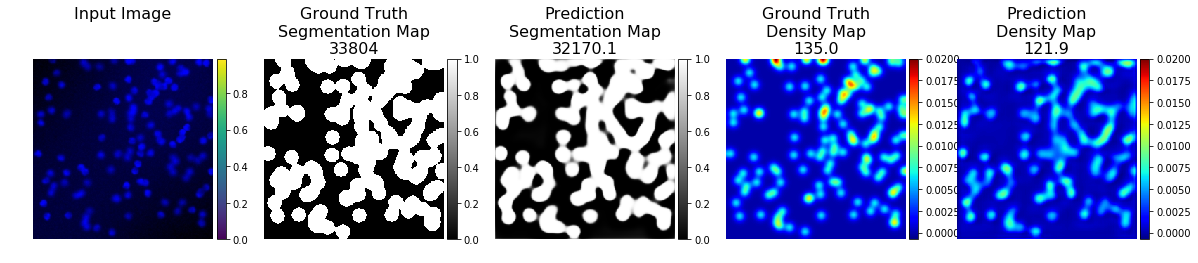

Epoch 1/1
 - 0s - loss: 0.0402 - activation_1_loss: 0.1178 - conv2d_12_loss: 0.0069
Epoch 1/1
 - 0s - loss: 0.0363 - activation_1_loss: 0.1044 - conv2d_12_loss: 0.0071
Epoch 1/1
 - 0s - loss: 0.0380 - activation_1_loss: 0.1113 - conv2d_12_loss: 0.0066
Epoch 1/1
 - 0s - loss: 0.0352 - activation_1_loss: 0.1025 - conv2d_12_loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0347 - activation_1_loss: 0.1007 - conv2d_12_loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0353 - activation_1_loss: 0.1010 - conv2d_12_loss: 0.0071
Epoch 1/1
 - 0s - loss: 0.0320 - activation_1_loss: 0.0926 - conv2d_12_loss: 0.0060
Epoch 1/1
 - 0s - loss: 0.0336 - activation_1_loss: 0.0969 - conv2d_12_loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0322 - activation_1_loss: 0.0933 - conv2d_12_loss: 0.0060
Epoch 1/1
 - 0s - loss: 0.0300 - activation_1_loss: 0.0866 - conv2d_12_loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0314 - activation_1_loss: 0.0918 - conv2d_12_loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0311 - activation_1_loss: 0.0892 - conv2d_12_loss:

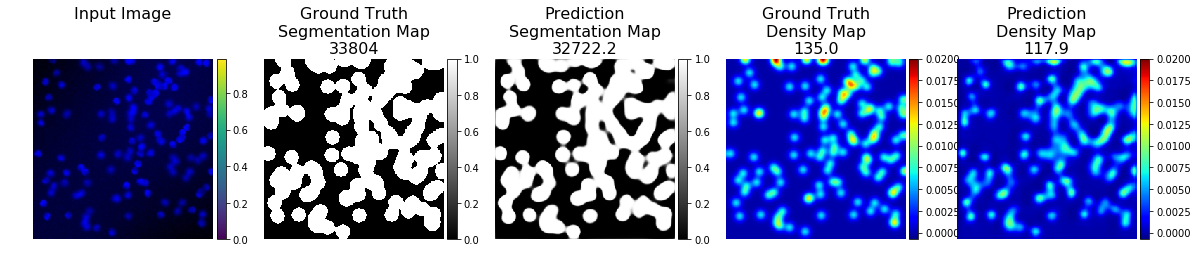

Epoch 1/1
 - 0s - loss: 0.0256 - activation_1_loss: 0.0742 - conv2d_12_loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0279 - activation_1_loss: 0.0828 - conv2d_12_loss: 0.0044
Epoch 1/1
 - 0s - loss: 0.0319 - activation_1_loss: 0.0963 - conv2d_12_loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0387 - activation_1_loss: 0.1171 - conv2d_12_loss: 0.0051
Epoch 1/1
 - 0s - loss: 0.0311 - activation_1_loss: 0.0927 - conv2d_12_loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0227 - activation_1_loss: 0.0660 - conv2d_12_loss: 0.0042
Epoch 1/1
 - 0s - loss: 0.0271 - activation_1_loss: 0.0807 - conv2d_12_loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0266 - activation_1_loss: 0.0796 - conv2d_12_loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0223 - activation_1_loss: 0.0650 - conv2d_12_loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0256 - activation_1_loss: 0.0760 - conv2d_12_loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0232 - activation_1_loss: 0.0678 - conv2d_12_loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0220 - activation_1_loss: 0.0643 - conv2d_12_loss:

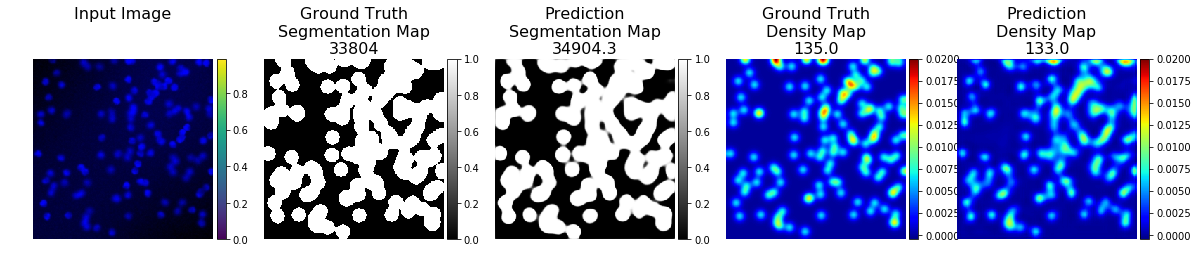

Epoch 1/1
 - 0s - loss: 0.0206 - activation_1_loss: 0.0614 - conv2d_12_loss: 0.0031
Epoch 1/1
 - 0s - loss: 0.0186 - activation_1_loss: 0.0547 - conv2d_12_loss: 0.0031
Epoch 1/1
 - 0s - loss: 0.0177 - activation_1_loss: 0.0519 - conv2d_12_loss: 0.0030
Epoch 1/1
 - 0s - loss: 0.0180 - activation_1_loss: 0.0529 - conv2d_12_loss: 0.0030
Epoch 1/1
 - 0s - loss: 0.0191 - activation_1_loss: 0.0564 - conv2d_12_loss: 0.0030
Epoch 1/1
 - 0s - loss: 0.0214 - activation_1_loss: 0.0648 - conv2d_12_loss: 0.0029
Epoch 1/1
 - 0s - loss: 0.0246 - activation_1_loss: 0.0749 - conv2d_12_loss: 0.0030
Epoch 1/1
 - 0s - loss: 0.0325 - activation_1_loss: 0.1000 - conv2d_12_loss: 0.0036
Epoch 1/1
 - 0s - loss: 0.0294 - activation_1_loss: 0.0901 - conv2d_12_loss: 0.0034
Epoch 1/1
 - 0s - loss: 0.0201 - activation_1_loss: 0.0607 - conv2d_12_loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0181 - activation_1_loss: 0.0541 - conv2d_12_loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0236 - activation_1_loss: 0.0724 - conv2d_12_loss:

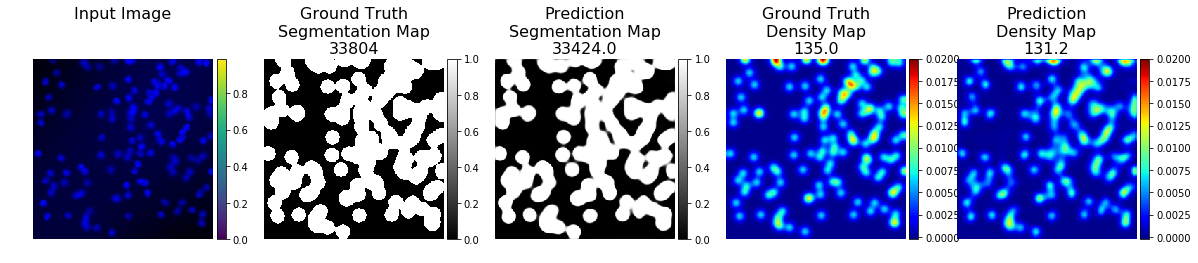

In [11]:
for i in range(100):
    model.fit(x, y, verbose=2)
    pred1, pred2 = model.predict(x)
    if (i + 1) % 20 == 0:
        print(f'Epoch {i+1:2d}:')
        plot_seg_reg_maps(img, gt_seg_map, pred1, gt_density_map, pred2, MULT_FACTOR)